In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
base_path = os.getcwd()
backend_root = os.path.dirname(base_path)

In [3]:
file_path = os.path.join(backend_root, "data/cleaned_merged_seasons.csv")
df = pd.read_csv(file_path)

/var/folders/yv/683h12gj4mdc5txzm0lh6j0h0000gn/T/ipykernel_54801/2866334842.py:2: DtypeWarning: Columns (2,3,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [4]:
df = df[df['season_x'].isin(['2024-25', '2023-24', '2022-23'])].copy()

In [5]:
df = df[df['minutes'] > 0].copy()

In [6]:
df.loc[df['total_points'] < 0, 'total_points'] = 0

In [ ]:
target = df['total_points']

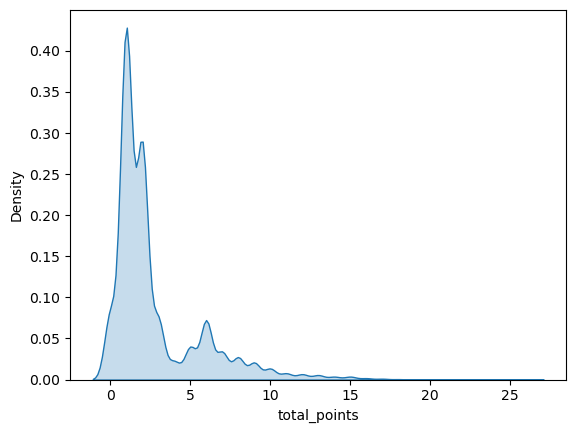

In [13]:
sns.kdeplot(target, fill=True)
plt.show()

In [ ]:
target_log = np.log1p(target)
#np.expm1 is used to reverse the log1p transformation

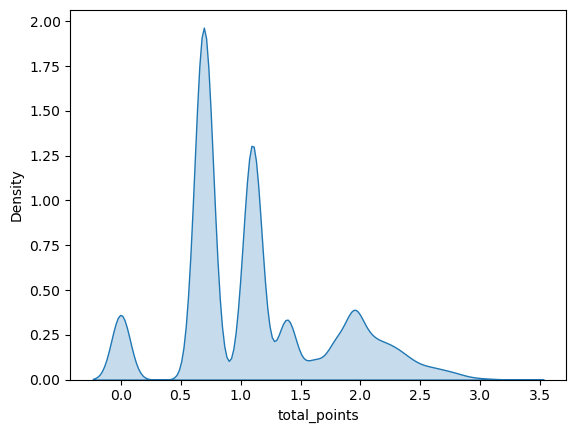

In [12]:
sns.kdeplot(target_log, fill=True)
plt.show()

In [14]:
original_outliers = target[target > target.quantile(0.95)]
log_outliers = target_log[target > target.quantile(0.95)]

print("Original outliers range:", original_outliers.min(), "to", original_outliers.max())
print("Log-transformed outliers range:", log_outliers.min(), "to", log_outliers.max())

Original outliers range: 10 to 26
Log-transformed outliers range: 2.3978952727983707 to 3.295836866004329
